<a href="https://colab.research.google.com/github/MaulanaJauhar/AI/blob/main/ImageClassification_JauharMaulanaA'la.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Image Classification Batu Gunting Kertas Menggunakan CNN(*Convolutional Neural Network*)


---


####Nama : Jauhar Maulana A'la
####NIM : 2141720186
####No Absen : 17
####Kelas : TI - 2C

In [111]:
from google.colab import drive
drive.mount('/content/drive')
import os
import pandas as pd
import numpy as np

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import load_img
from keras_preprocessing.image import img_to_array
from keras_preprocessing.image import ImageDataGenerator
from keras_preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
%matplotlib inline

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###Load Data

In [112]:
PARENT_DIR = '/content/drive/MyDrive/Colab Notebooks/rps-cv-images'
rock_child_dir = os.path.join(PARENT_DIR,'rock')
paper_child_dir = os.path.join(PARENT_DIR,'paper')
scissors_child_dir = os.path.join(PARENT_DIR,'scissors')
os.listdir(PARENT_DIR)

['scissors', 'rock', 'paper']

###Mengecek Folder didalam GDrive yang menyimpan file foto

In [113]:
print('Data from Rock Directory')
print(os.listdir(rock_child_dir))
print('Data from Paper Directory')
print(os.listdir(paper_child_dir))
print('Data from Scissors Directory')
print(os.listdir(scissors_child_dir))

Data from Rock Directory
['1COBZEE1ALiJIivQ.png', '0P6uxM8Vr1DwySHe.png', '1BqjHe5igJAgUjiN.png', '19H63c0MWD56EWNq.png', '0OEXfEooCXlljaEl.png', '02vG75hQW9Vp4oTl.png', '0NDYNEoDui7o64gU.png', '0bioBZYFCXqJIulm.png', '01dM3ewPIsnBICu1.png', '00nKV8oHuTGi20gq.png', '3ONDEuB8iwAYO1Uz.png', '3sQLj3fYBZhheJ7K.png', '3MSy75FXVzhhLg77.png', '3aRXheNUQ6cxechp.png', '337ARHTZmhCSkoEM.png', '3k7WrSAInCaatFtl.png', '32PDtFdAkUiAJbmP.png', '2UaJz6Z3xJv3WX9h.png', '2vwLOZSd8FCXbuck.png', '2uxDLQKemRqulhIx.png', '2uVMdMj10yjpR6Py.png', '2Pt5UNQkMzXLtbEp.png', '2O9XPBJRT119drWX.png', '1wk2Hl1Ih9guOwx6.png', '1UXuUYJ4rVj2eSvt.png', '1vvcitV1s17gKdbn.png', '1WuMUpzupKs67q29.png', '1VoYiUgPE6h45MLu.png', '1UucZqS3qblvU0cH.png', '1MOm36DHK0R8OfIC.png', '2EAkMCm7ZLnNoBQ7.png', '2DdERUV7Te8ivywq.png', '2f25VA1nfxiC86xj.png', '2nSUlcvPf1DOCo1j.png', '2j9iOcnxJzcyaFB5.png', '2JRYQXb5kmlhgD5i.png', '2NmrcDGkc7FQuu12.png', '2MKZD0VUw7Tez2Jx.png', '2HSPQEteONUjEXAF.png', '1DxbXT3M2qiMjCmC.png', '2affjOmZChc9A

In [114]:
rock_loaded_img = os.listdir(rock_child_dir)
paper_loaded_img = os.listdir(paper_child_dir)
scissors_loaded_img = os.listdir(scissors_child_dir)

###Menampilkan Contoh Image dari masing masing folder

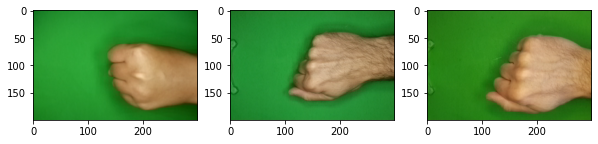

In [115]:
plt.figure(figsize=(10, 4))
for i, img_path in enumerate(rock_loaded_img[:3]):
    sp = plt.subplot(1, 3, i+1)
    img = mpimg.imread(os.path.join(rock_child_dir, img_path))
    plt.imshow(img)
plt.show()

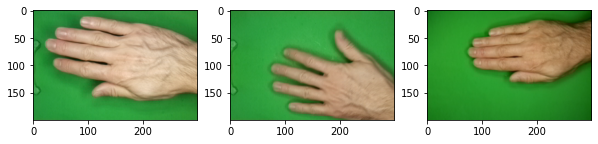

In [116]:
plt.figure(figsize=(10, 4))
for i, img_path in enumerate(paper_loaded_img[:3]):
    sp = plt.subplot(1, 3, i+1)
    img = mpimg.imread(os.path.join(paper_child_dir, img_path))
    plt.imshow(img)
plt.show()

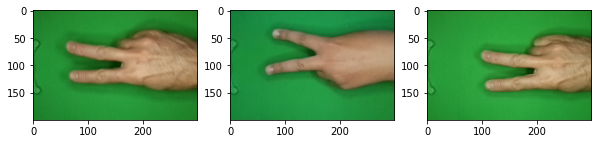

In [117]:
plt.figure(figsize=(10, 4))
for i, img_path in enumerate(scissors_loaded_img[:3]):
    sp = plt.subplot(1, 3, i+1)
    img = mpimg.imread(os.path.join(scissors_child_dir, img_path))
    plt.imshow(img)
plt.show()

###Membagi Data menjadi Training Set dan Validation Set

In [118]:
data_generator = ImageDataGenerator(validation_split=0.4,
                                    rotation_range=20, 
                                    rescale=1./255)
generate_train = data_generator.flow_from_directory(PARENT_DIR,
                                                    target_size=(120, 120),
                                                    subset='training')
generate_validation = data_generator.flow_from_directory(PARENT_DIR,
                                                         target_size=(120, 120),
                                                         subset='validation')

Found 360 images belonging to 3 classes.
Found 240 images belonging to 3 classes.


###Menyiapkan Model Sequential

In [119]:
model = tf.keras.models.Sequential([
                                    
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(120, 120, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Dropout(0.2),

        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Dropout(0.2),

        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Dropout(0.2),

        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),

        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(3, activation=tf.nn.softmax)
])

In [120]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [121]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 118, 118, 32)      896       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 59, 59, 32)       0         
 g2D)                                                            
                                                                 
 dropout_24 (Dropout)        (None, 59, 59, 32)        0         
                                                                 
 conv2d_25 (Conv2D)          (None, 57, 57, 64)        18496     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 28, 28, 64)       0         
 g2D)                                                            
                                                                 
 dropout_25 (Dropout)        (None, 28, 28, 64)       

###Membuat Callback untuk pengingat jika proses telah selesai

In [122]:
class TargetCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') >= 0.9850):
            print("\nModel Has Reached %2.2f%% accuracy, training stopped" %(logs.get('accuracy')*100))
            self.model.stop_training = True
callback = TargetCallback()

In [123]:
history = model.fit(
    generate_train,
    steps_per_epoch=10,
    epochs = 25,
    validation_data = generate_validation,
    validation_steps=5,
    verbose = 2,
    callbacks = [callback])

Epoch 1/25
10/10 - 15s - loss: 1.1348 - accuracy: 0.3649 - val_loss: 1.0954 - val_accuracy: 0.3750 - 15s/epoch - 2s/step
Epoch 2/25
10/10 - 14s - loss: 1.0713 - accuracy: 0.4844 - val_loss: 1.0533 - val_accuracy: 0.6562 - 14s/epoch - 1s/step
Epoch 3/25
10/10 - 13s - loss: 1.0029 - accuracy: 0.5439 - val_loss: 0.9334 - val_accuracy: 0.6687 - 13s/epoch - 1s/step
Epoch 4/25
10/10 - 13s - loss: 0.8034 - accuracy: 0.7027 - val_loss: 0.7368 - val_accuracy: 0.7750 - 13s/epoch - 1s/step
Epoch 5/25
10/10 - 13s - loss: 0.6459 - accuracy: 0.7534 - val_loss: 0.5525 - val_accuracy: 0.8250 - 13s/epoch - 1s/step
Epoch 6/25
10/10 - 13s - loss: 0.6940 - accuracy: 0.7297 - val_loss: 0.6874 - val_accuracy: 0.7250 - 13s/epoch - 1s/step
Epoch 7/25
10/10 - 13s - loss: 0.5161 - accuracy: 0.7939 - val_loss: 0.4197 - val_accuracy: 0.9062 - 13s/epoch - 1s/step
Epoch 8/25
10/10 - 13s - loss: 0.4104 - accuracy: 0.8412 - val_loss: 0.2708 - val_accuracy: 0.9125 - 13s/epoch - 1s/step
Epoch 9/25
10/10 - 13s - loss: 0

###Menampilkan gambar yang sudah diproses apakah sesuai dengan label yang diberikan

1/1 [==============================] - 0s 104ms/step
Scissors


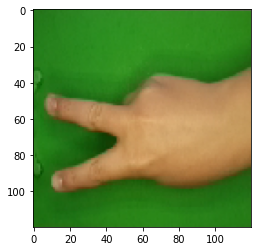

In [124]:
uploaded = os.path.join(scissors_child_dir,'0CSaM2vL2cWX6Cay.png')
img = image.load_img(uploaded, target_size = (120, 120))
 
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict(images, batch_size=10)  

if classes[0, 0] == 1:
  print('Paper')
elif classes[0, 1] == 1:
  print('Rock')
else:
  print('Scissors')

1/1 [==============================] - 0s 29ms/step
Paper


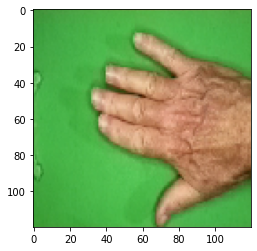

In [125]:
uploaded = os.path.join(paper_child_dir,'1yeoLbmp4alVOtFv.png')
img = image.load_img(uploaded, target_size = (120, 120))
 
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict(images, batch_size=10)  

if classes[0, 0] == 1:
  print('Paper')
elif classes[0, 1] == 1:
  print('Rock')
else:
  print('Scissors')

1/1 [==============================] - 0s 28ms/step
Rock


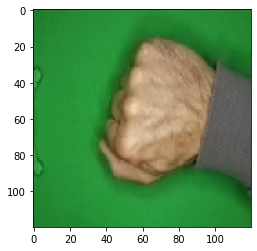

In [126]:
uploaded = os.path.join(rock_child_dir,'2UaJz6Z3xJv3WX9h.png')
img = image.load_img(uploaded, target_size = (120, 120))
 
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict(images, batch_size=10)  

if classes[0, 0] == 1:
  print('Paper')
elif classes[0, 1] == 1:
  print('Rock')
else:
  print('Scissors')